In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stock-price/NVDIA.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os

# List files in the directory to find the correct file name
directory = "/kaggle/input/nvidia-stock-price"
os.listdir(directory)


['NVDIA.csv']

In [5]:
df = pd.read_csv("/kaggle/input/nvidia-stock-price/NVDIA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [6]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,0.043750,0.048828,0.038802,0.041016,2714688000
1,0.044271,0.045833,0.041016,0.045313,510480000
2,0.045833,0.046745,0.041146,0.041797,343200000
3,0.041927,0.042969,0.039583,0.041667,244368000
4,0.041667,0.041927,0.041276,0.041536,227520000
...,...,...,...,...,...
6423,103.760002,108.720001,101.370003,107.269997,482027500
6424,92.059998,103.410004,90.690002,100.449997,552842400
6425,103.839996,107.709999,100.550003,104.250000,409012100
6426,107.809998,108.800003,98.690002,98.910004,411440400


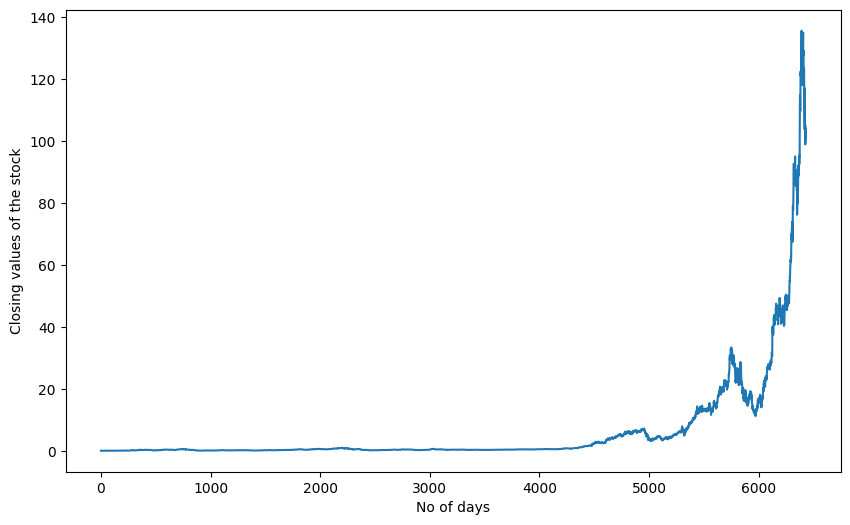

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df.Close)    # Closing price for NVIDIA Stocks
plt.xlabel('No of days')
plt.ylabel('Closing values of the stock')
plt.show()

In [8]:
# Calculating the moving average 100 i.e. the average is calculated based on the last 
# 100 data points of time in a time series analysis
# we have to calculate the mean of previous 100 consecutive closing values
# for that we are going to use the df.rolling() function of pandas
ma100=df.Close.rolling(100).mean()
ma100
# for rows 0 to 100 the rolling() function will calculate the mean when it comes at 101 th row

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6423    104.48783
6424    104.57320
6425    104.70682
6426    104.81648
6427    104.98781
Name: Close, Length: 6428, dtype: float64

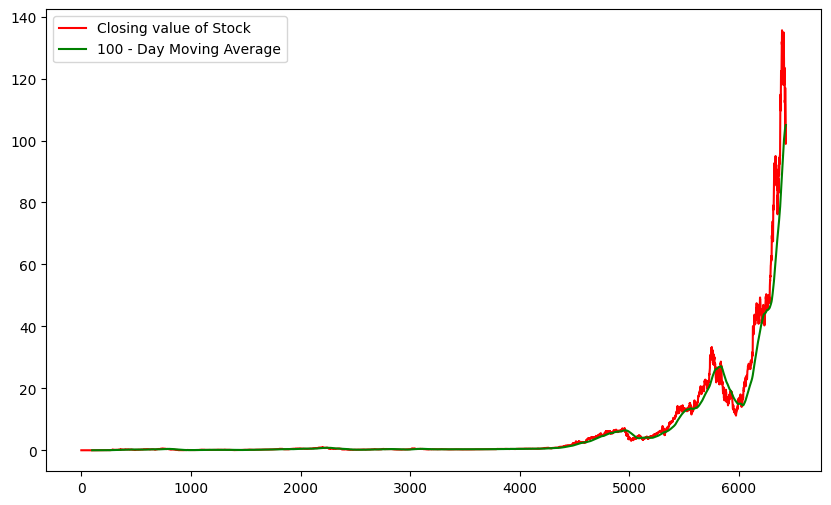

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df.Close, color='r', label='Closing value of Stock')
plt.plot(ma100, color='g', label='100 - Day Moving Average')
plt.legend()
plt.show()

# If the stock price stays consistently above the moving average price of the stock 
# then it indicates an upward trend.....

In [10]:
# Calculating moving average 200
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6423    80.548815
6424    80.831375
6425    81.141645
6426    81.425690
6427    81.743605
Name: Close, Length: 6428, dtype: float64

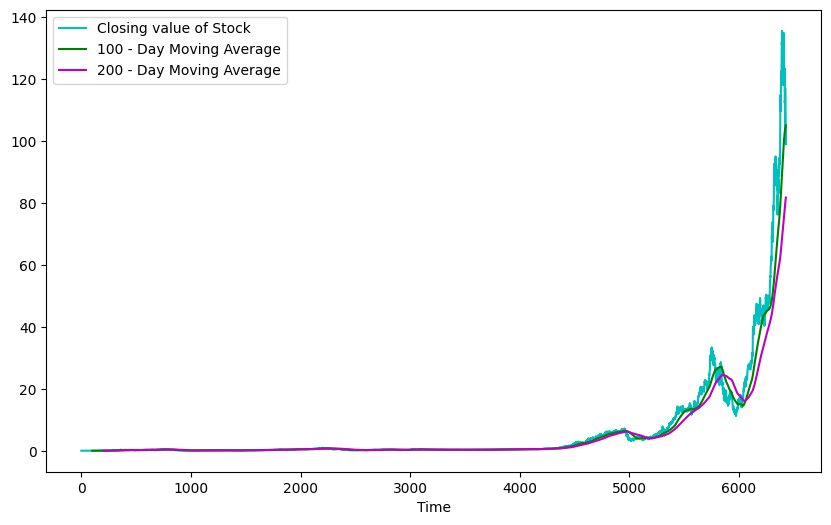

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.Close, color='c', label='Closing value of Stock')
plt.plot(ma100, color='g', label='100 - Day Moving Average')
plt.plot(ma200, color='m', label='200 - Day Moving Average')
plt.xlabel("Time")
plt.legend()
plt.show()

In [12]:
df.head()

,Open,High,Low,Close,Volume
0,0.043750,0.048828,0.038802,0.041016,2714688000
1,0.044271,0.045833,0.041016,0.045313,510480000
2,0.045833,0.046745,0.041146,0.041797,343200000
3,0.041927,0.042969,0.039583,0.041667,244368000
4,0.041667,0.041927,0.041276,0.041536,227520000


In [13]:
# Step 1: Splitting the data in 'Close' column into training and testing data
train_data=pd.DataFrame(df['Close'][0: int(len(df)*0.70)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.70):])
print(train_data.shape) 
print(test_data.shape)

(4499, 1)
(1929, 1)


In [14]:
train_data
test_data

,Close
4499,2.376750
4500,2.337000
4501,2.295500
4502,2.239750
4503,2.279250
...,...
6423,107.269997
6424,100.449997
6425,104.250000
6426,98.910004


In [15]:
# Step 2: Scale the training data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
train_data_arr=scaler.fit_transform(train_data)
train_data_arr

array([[0.00297472],
       [0.00482696],
       [0.00331137],
       ...,
       [0.93846678],
       [0.97542982],
       [0.99170217]])

In [17]:
# Step 3: Divide the training data into X_train and y_train 
# the predicted value of stock on 101th day will depend on all the previous 100 stock values
# so the 100 values will be X_train and 101th day predictive value will be stored in y_train
# each time the previous predicted value will become part of X_train and its first value will be omitted and the new value becomes y_train
train_data_arr.shape

(4499, 1)

In [18]:
X_train=[]
y_train=[]

# 100 steps     i-->is the no of rows here
# 1........100  101
for i in range(100, train_data_arr.shape[0]):  # i-> 100, 101...
    X_train.append(train_data_arr[i-100 : i])   # values from array's 0 to i-1(99) index
    y_train.append(train_data_arr[i, 0])   # every rows first column value is added in y_train
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [19]:
X_train.shape # rows, columns

(4399, 100, 1)

In [20]:
# Step 4: Creating the LSTM Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2024-08-29 08:07:01.384939: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 08:07:01.385081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 08:07:01.581367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

KeyboardInterrupt



In [ ]:
model=Sequential()
# adding LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True
              , input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# adding dense layer
model.add(Dense(units=1))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=70)

In [ ]:
# Save the model in HDF5 format
model.save('lstm_model_70.h5')

In [ ]:
# Performing operations on testing data
test_data.head()

In [ ]:
past_100_days=train_data.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, test_data], ignore_index=True)
final_df

In [ ]:
# Scale down the testing values
input_data=scaler.fit_transform(final_df)
input_data.shape

In [ ]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test=np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Making predictions
y_pred=model.predict(x_test)
y_pred.shape

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
# Now scale up the y_pred values using scale factor
scaler.scale_

In [ ]:
# divide y_pred and y_test by scale factor
scale_factor=1/0.00744847
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

In [ ]:
# Plot the graph between y_pred and y_test
plt.figure(figsize=(10,6))
plt.plot(y_test, color='b', label='Original Price')
plt.plot(y_pred, color='g', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Trend Prediction', size=20)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2*100)